# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

1. Determine Business Objectives

(1) Background: The provided dataset contains information on 426K cars including features and price/value. 

(2) Business Objectives: The goal is to understand what factors/features make a car more or less expensive. 

(3) Business Success Criteria: As a result of this model based analysis, the model should provide clear recommendations to the client what consumers value in a used car and we can provide a clear indication about the estimated price


2. Assess Situation

(1) Inventory of Resources: class chat in module 11, python and modeling, and other previous trainings in this course. 

(2) Requirements, Assumptions, and Constraints: this is a practice work due Feb 28th, no legal issue with data usage. The assumptions are good data collection in the public database. Due to the limiation of CPU power, a fration of the whole dataset (containing 3 million cars) was used. 

(3) Risks and Contingencies terminology: The success may rely on good analysis skillset of the performer in this case.

(4) Costs and Benefits: It is a good business model which could be used for car resale companies across the world. 


3. Determine Data Mining Goals

（1） Data Mining Goals：Predict the price range that a seller willing to sell and a buyer willing to buy, and calcualte the business model about the gap between the buying price and sale price as revenue for the car.

（2） Data Mining Success Criteria：MSE or error rate when using trained model to predict the price of sale to untrained dataset. 


4. Produce Project Plan

（1） Project Plan：the CRISP-DM standard protocol will be carried out, in total, 16 hrs for data understanding/preparation/modeling/evaluation/deployment

（2） Initial Assessment of Tools and Techniques：


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split

In [8]:
# Colletct initial data
# Output: Sample size: 426880, features: 18 (one is ID), price will be the key value (y), year and odometer could be our focus on analysis
df = pd.read_csv('data/vehicles.csv')

In [9]:
df

id                  region  price    year manufacturer  \
0       7222695916                prescott   6000     NaN          NaN   
1       7218891961            fayetteville  11900     NaN          NaN   
2       7221797935            florida keys  21000     NaN          NaN   
3       7222270760  worcester / central MA   1500     NaN          NaN   
4       7210384030              greensboro   4900     NaN          NaN   
...            ...                     ...    ...     ...          ...   
426875  7301591192                 wyoming  23590  2019.0       nissan   
426876  7301591187                 wyoming  30590  2020.0        volvo   
426877  7301591147                 wyoming  34990  2020.0     cadillac   
426878  7301591140                 wyoming  28990  2018.0        lexus   
426879  7301591129                 wyoming  30590  2019.0          bmw   

                           model condition    cylinders    fuel  odometer  \
0                            NaN       NaN          NaN     NaN       NaN   
1                            NaN       NaN          NaN     NaN       NaN   
2                            NaN       NaN          NaN     NaN       NaN   
3                            NaN       NaN          NaN     NaN       NaN   
4                            NaN       NaN          NaN     NaN       NaN   
...                          ...       ...          ...     ...       ...   
426875         maxima s sedan 4d      good  6 cylinders     gas   32226.0   
426876  s60 t5 momentum sedan 4d      good          NaN     gas   12029.0   
426877          xt4 sport suv 4d      good          NaN  diesel    4174.0   
426878           es 350 sedan 4d      good  6 cylinders     gas   30112.0   
426879  4 series 430i gran coupe      good          NaN     gas   22716.0   

       title_status transmission                VIN drive size       type  \
0               NaN          NaN                NaN   NaN  NaN        NaN   
1               NaN          NaN                NaN   NaN  NaN        NaN   
2               NaN          NaN                NaN   NaN  NaN        NaN   
3               NaN          NaN                NaN   NaN  NaN        NaN   
4               NaN          NaN                NaN   NaN  NaN        NaN   
...             ...          ...                ...   ...  ...        ...   
426875        clean        other  1N4AA6AV6KC367801   fwd  NaN      sedan   
426876        clean        other  7JR102FKXLG042696   fwd  NaN      sedan   
426877        clean        other  1GYFZFR46LF088296   NaN  NaN  hatchback   
426878        clean        other  58ABK1GG4JU103853   fwd  NaN      sedan   
426879        clean        other  WBA4J1C58KBM14708   rwd  NaN      coupe   

       paint_color state  
0              NaN    az  
1              NaN    ar  
2              NaN    fl  
3              NaN    ma  
4              NaN    nc  
...            ...   ...  
426875         NaN    wy  
426876         red    wy  
426877       white    wy  
426878      silver    wy  
426879         NaN    wy  

[426880 rows x 18 columns]

In [10]:
# Describe data
# Output: in this DataFrame, we can see sample size: 426880, features: 18: 
['id',
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

df.describe()


id         price           year      odometer
count  4.268800e+05  4.268800e+05  425675.000000  4.224800e+05
mean   7.311487e+09  7.519903e+04    2011.235191  9.804333e+04
std    4.473170e+06  1.218228e+07       9.452120  2.138815e+05
min    7.207408e+09  0.000000e+00    1900.000000  0.000000e+00
25%    7.308143e+09  5.900000e+03    2008.000000  3.770400e+04
50%    7.312621e+09  1.395000e+04    2013.000000  8.554800e+04
75%    7.315254e+09  2.648575e+04    2017.000000  1.335425e+05
max    7.317101e+09  3.736929e+09    2022.000000  1.000000e+07

In [11]:
#data info especially Dtype for future analysis and no need to remove null if needed in the next section
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [12]:
# Based on analysis, ID and VIN should not make an impact on the price, in that, they are removed from feature list
df = df [[
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']]

In [13]:
# odometer limit is 1M miles 
df2 = df[df['odometer'] < 400000]  

In [14]:
# price is narrowned down to less than 100K
df2 = df2[df2['price'] < 100000] 

In [15]:
df2.describe()

price           year       odometer
count  420067.000000  418949.000000  420067.000000
mean    17356.466449    2011.278936   91065.984274
std     14767.109634       9.343884   62797.871929
min         0.000000    1900.000000       0.000000
25%      5990.000000    2008.000000   37650.000000
50%     13990.000000    2013.000000   85134.000000
75%     26500.000000    2017.000000  132992.500000
max     99999.000000    2022.000000  399999.000000

In [16]:
df2.shape

(420067, 16)

<AxesSubplot:xlabel='odometer', ylabel='price'>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


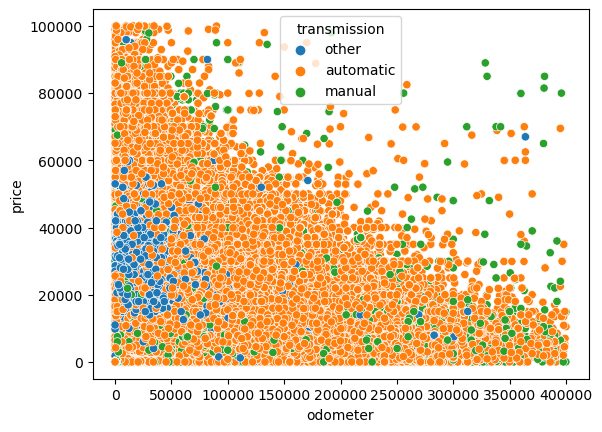

In [29]:
# initial price and odometer check found outliers which will be removed inthe next section
sns.scatterplot(x=df2['odometer'], y=df2['price'], hue=df2['transmission'])

<AxesSubplot:xlabel='year', ylabel='price'>

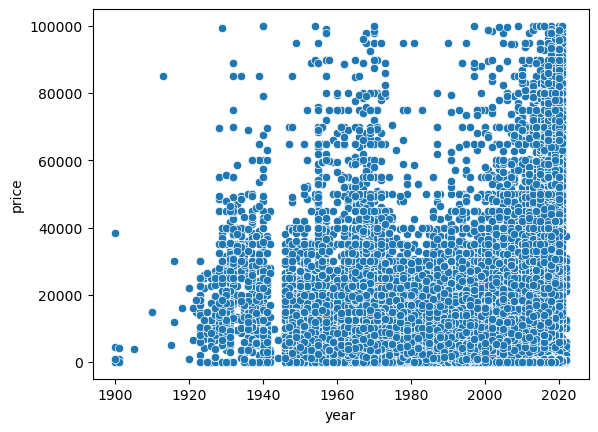

In [30]:
# check 
sns.scatterplot(x=df2['year'], y=df2['price'])

<AxesSubplot:xlabel='transmission', ylabel='count'>

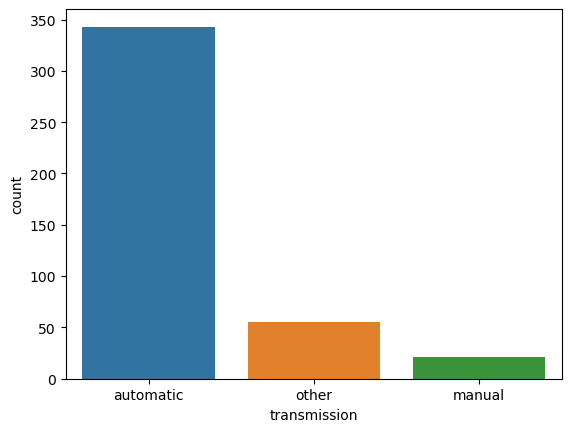

In [43]:
#due to complexity (too many datapoints), run data-prep below then comeback to run this to get the figure
sns.countplot(x='transmission',  data=plot_df)

In [32]:
#Verify data qualit, in this section, we confirm it covers all the data we need, there are missing values in the dataframe
# in the next section, we will prep the data for modeling
# We will drop the features with large amount of data missing for modeling 
missing_data = pd.DataFrame(
    df2.isnull().sum(),
    columns=['Missing Values']
)
missing_data

Missing Values
region                     0
price                      0
year                    1118
manufacturer           16508
model                   4993
condition             170490
cylinders             173644
fuel                    2363
odometer                   0
title_status            7600
transmission            1668
drive                 127819
size                  301086
type                   90763
paint_color           127113
state                      0

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [17]:
# Select data, based on the data quality analysis, to build a reliable model, we will only keep featuers releveant and without large portion of nan data for further analysis

df3 = df2 [[
 'region',
 'price',
 'year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'state']]

In [18]:
df3.describe()

price           year       odometer
count  420067.000000  418949.000000  420067.000000
mean    17356.466449    2011.278936   91065.984274
std     14767.109634       9.343884   62797.871929
min         0.000000    1900.000000       0.000000
25%      5990.000000    2008.000000   37650.000000
50%     13990.000000    2013.000000   85134.000000
75%     26500.000000    2017.000000  132992.500000
max     99999.000000    2022.000000  399999.000000

In [19]:
# Due to the large size of the dataset, a randome selection was used to plot, use the trainset to narrow down (1% of the dataset) the number to get the overview
# The sub-dataset will be used to test some programing running time
from sklearn.model_selection import train_test_split, GridSearchCV
plot_df, rest_df = train_test_split(df3, random_state=42, test_size = 0.999)  

<AxesSubplot:xlabel='region', ylabel='price'>

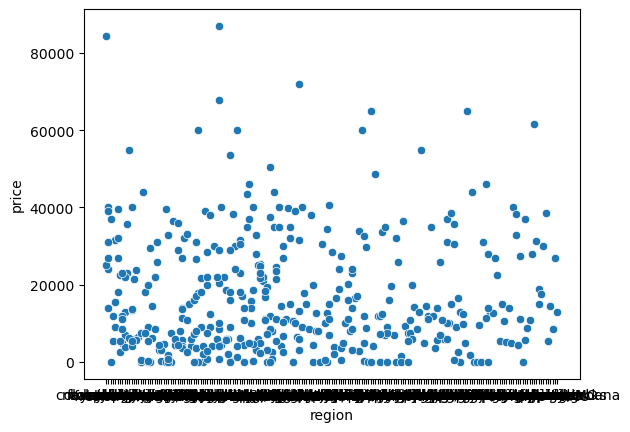

In [37]:
# Select data, the major features will affect price in df3 were screened as below: 
# we have see previously odometer and year may have direct effect
sns.scatterplot(x=plot_df['region'], y=plot_df['price'])


<AxesSubplot:xlabel='manufacturer', ylabel='price'>

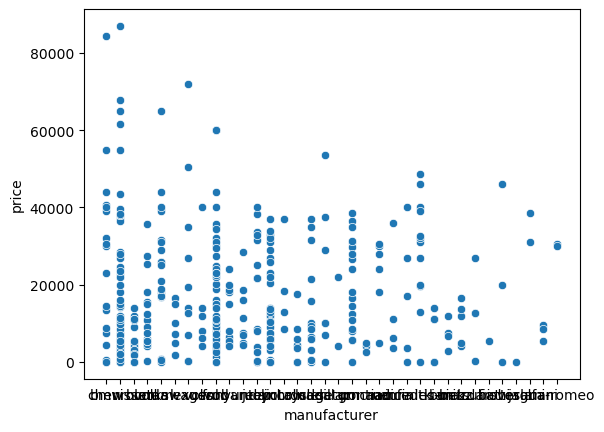

In [38]:
# Select data, the major features will affect price in df3 were screened as below:
sns.scatterplot(x=plot_df['manufacturer'], y=plot_df['price'])


<AxesSubplot:xlabel='model', ylabel='price'>

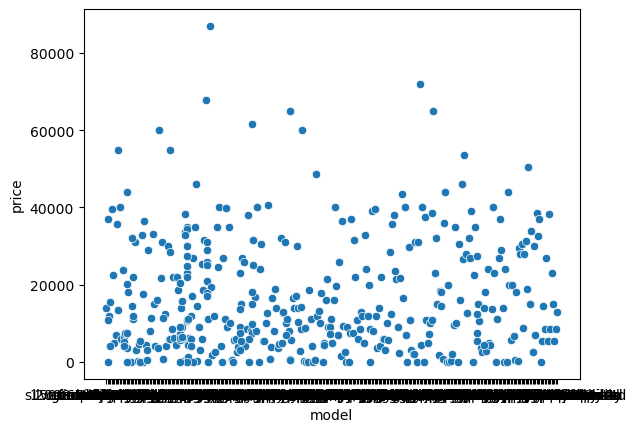

In [39]:
# Select data, the major features will affect price in df3 were screened as below:
sns.scatterplot(x=plot_df['model'], y=plot_df['price'])


<AxesSubplot:xlabel='fuel', ylabel='price'>

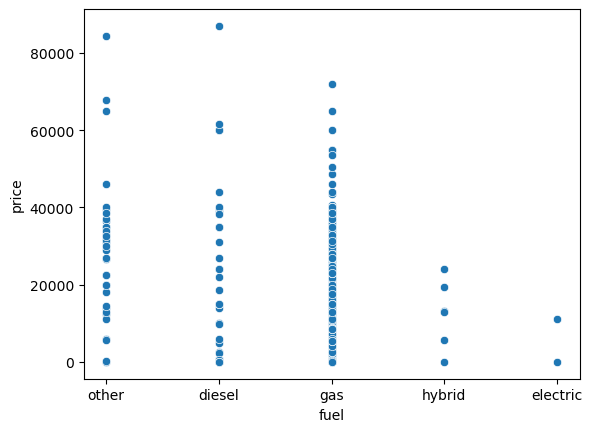

In [40]:
# Select data, the major features will affect price in df3 were screened as below:
sns.scatterplot(x=plot_df['fuel'], y=plot_df['price'])


<AxesSubplot:xlabel='title_status', ylabel='price'>

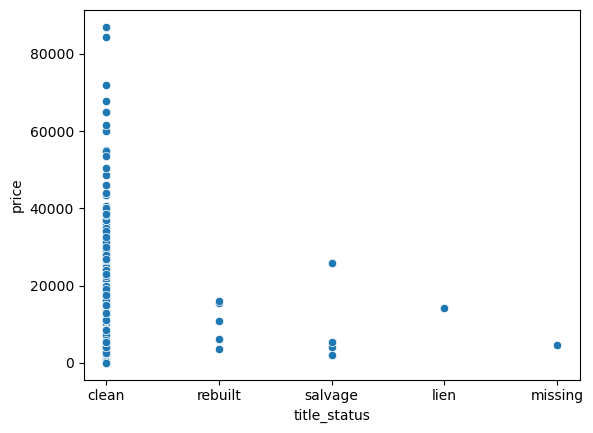

In [44]:
# Select data, the major features will affect price in df3 were screened as below:
sns.scatterplot(x=plot_df['title_status'], y=plot_df['price'])


<AxesSubplot:xlabel='transmission', ylabel='price'>

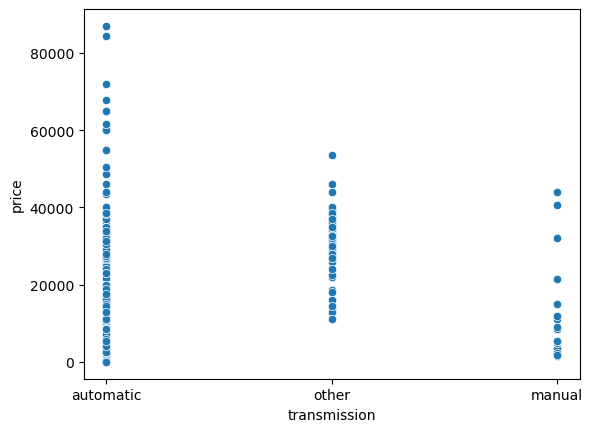

In [42]:
# Select data, the major features will affect price in df3 were screened as below:
sns.scatterplot(x=plot_df['transmission'], y=plot_df['price'])


<AxesSubplot:xlabel='state', ylabel='price'>

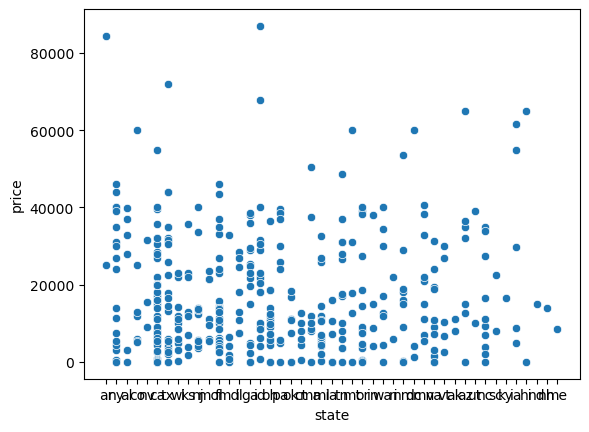

In [77]:
# Select data, the major features will affect price in df3 were screened as below:
sns.scatterplot(x=plot_df['state'], y=plot_df['price'])



In [ ]:
# Select data, the major features will affect price in df3 were screened as below:
plot_df = plot_df.drop(columns=['year','odometer'])

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

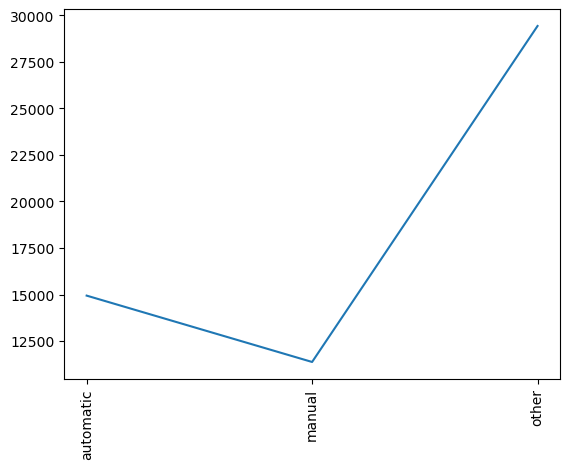

In [48]:
plt.plot(plot_df.groupby('transmission').mean())
plt.xticks(rotation=90)
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

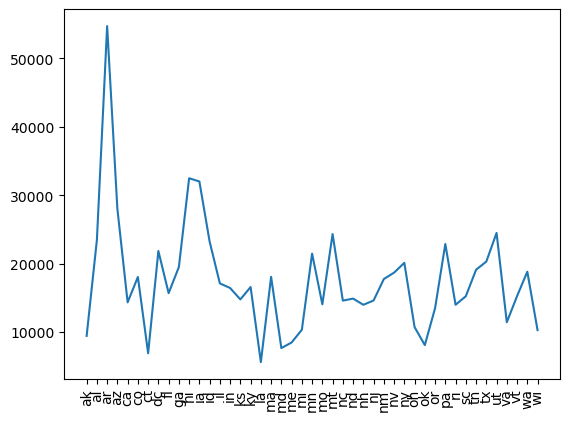

In [49]:
plt.plot(plot_df.groupby('state').mean())
plt.xticks(rotation=90)
plt

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

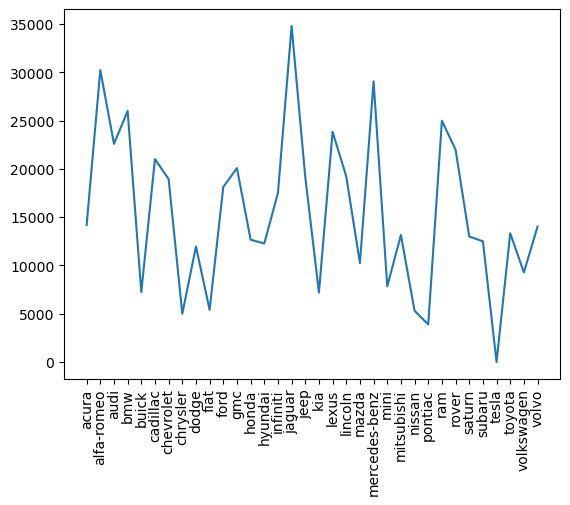

In [50]:
plt.plot(plot_df.groupby('manufacturer').mean()) #I have question on the tesla price in this case
plt.xticks(rotation=90)
plt

In [96]:
plt.figure(figsize=(125, 125))
plt.plot(plot_df.groupby('model').mean()) #model may play a role, but there are too many models to, it is not a good feature to be included for a universal model
plt.xticks(rotation=90)
plt #although we can not see the names of model, but it is understood that there are too many models for our modeling 

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [20]:
#In the final data inclusion: features are odometer, year, transmission.
df3 = df3[['price','odometer','year', 'transmission']]

In [21]:
df3.head()

price  odometer    year transmission
27  33590   57923.0  2014.0        other
28  22590   71229.0  2010.0        other
29  39590   19160.0  2020.0        other
30  30990   41124.0  2017.0        other
31  15000  128000.0  2013.0    automatic

In [22]:
# Clean data, since I do not have much background info for guessing the price, the goal is to remove non-relevant data which will cause miss-prediction in modelling step
df4 = df3.dropna(inplace=True)

In [23]:
df3.shape

(417281, 4)

In [24]:
#check again the missing-data
missing_data = pd.DataFrame(
    df3.isnull().sum(),
    columns=['Missing Values']
)
missing_data

Missing Values
price                      0
odometer                   0
year                       0
transmission               0

In [25]:
#Construct data, in this step, derived attributes were considrered for modelling 

In [26]:
#non-numeric value changed for next step
df3.replace({'transmission':{'manual':0, 'automatic':1, 'other':2}}, inplace=True)

In [58]:
# correlation was analyzed after the change
df3.corr()

price  odometer      year  transmission
price         1.000000 -0.439238  0.294590      0.265163
odometer     -0.439238  1.000000 -0.315057     -0.329379
year          0.294590 -0.315057  1.000000      0.331880
transmission  0.265163 -0.329379  0.331880      1.000000

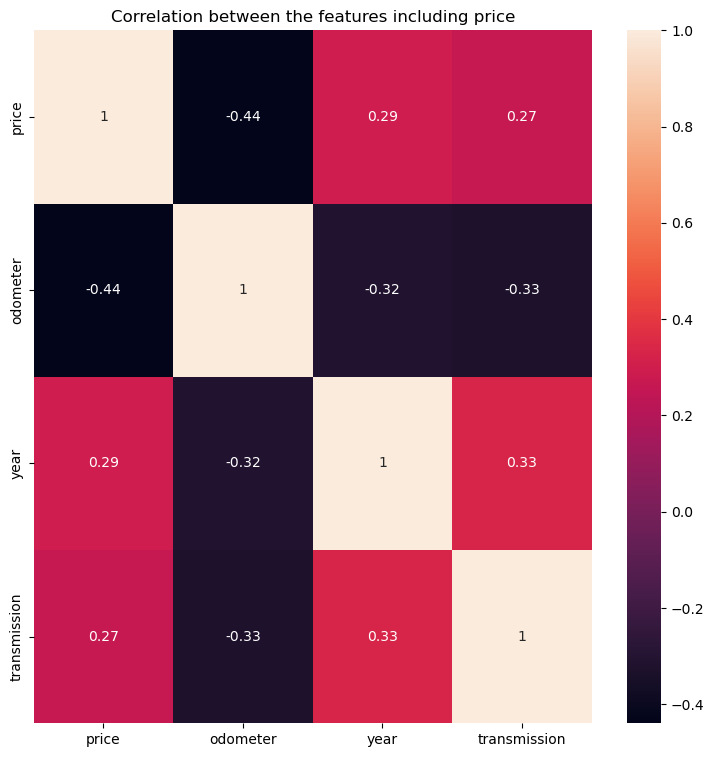

In [59]:
# now we can plot the figure to understand the correlation better/easier
plt.figure(figsize=(9,9))
sns.heatmap(df3.corr(), annot=True)
plt.title('Correlation between the features including price')
plt.show()

In [60]:
df3.corr()['price'].sort_values() #one thing to be noticed is that transmission correlated with year (upgarde from others to automated could be the reason)

odometer       -0.439238
transmission    0.265163
year            0.294590
price           1.000000
Name: price, dtype: float64

<AxesSubplot:title={'center':'correlation between year and price'}, xlabel='price', ylabel='year'>

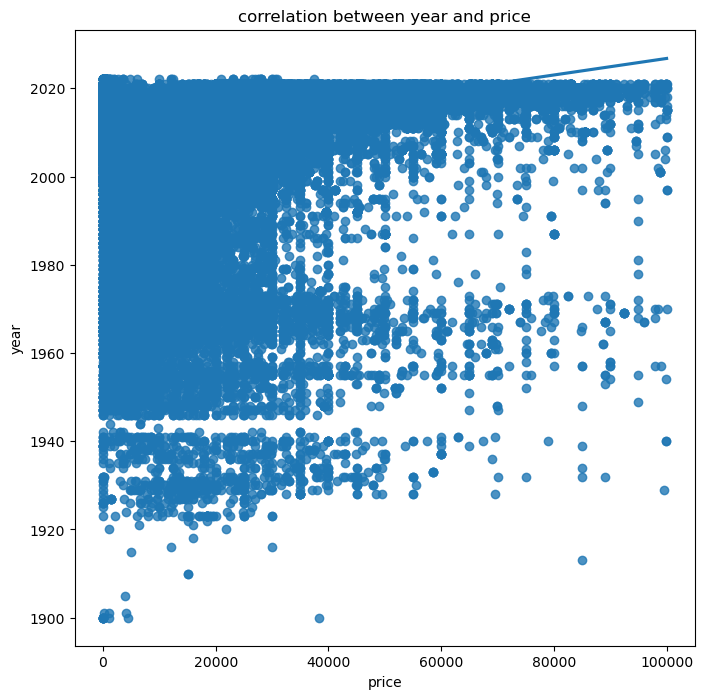

In [61]:
# we can futher visualize what we found in the correlation work
fig = plt.figure(figsize=(8,8))
plt.title('correlation between year and price')
sns.regplot(x='price', y='year', data=df3)


<AxesSubplot:title={'center':'correlation between transmission and price'}, xlabel='price', ylabel='transmission'>

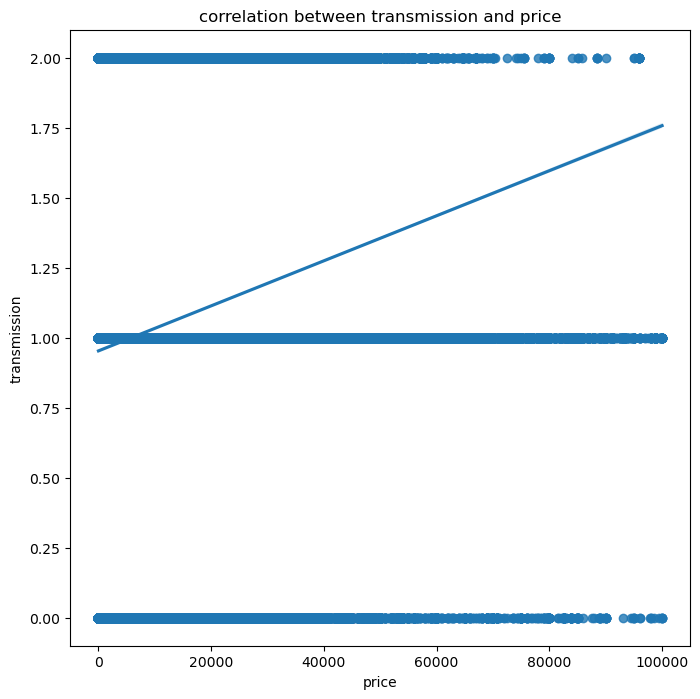

In [62]:
# we can futher visualize what we found in the correlation work, however, it is hard to find the correlation with categorical data in this case
fig = plt.figure(figsize=(8,8))
plt.title('correlation between transmission and price')
sns.regplot(x='price', y='transmission', data=df3)

<AxesSubplot:title={'center':'correlation between odometer and price'}, xlabel='price', ylabel='odometer'>

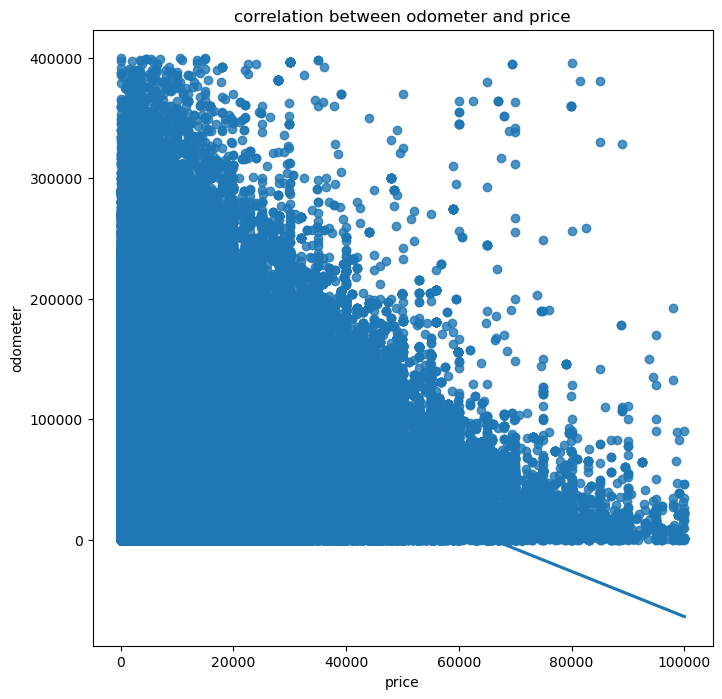

In [63]:
# we can futher visualize what we found in the correlation work
fig = plt.figure(figsize=(8,8))
plt.title('correlation between odometer and price')
sns.regplot(x='price', y='odometer', data=df3)

In [ ]:
#integrate data, this step has been done during the previous steps to organize the dataset

In [ ]:
# Format data, since we are not doing AI based training in this case, we will use in-build random selection data

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [27]:
#Select Modeling Technique : here we are going to start with lineareression then move forward with 
#Output: Modeling technique and Modelling assumptions

import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import Ridge
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [ ]:
#Generae test design (separate the train and test datasets)
#Test design: random divide into training and testing 

In [28]:
X = df3.drop(['price'], axis=1)
y = df3['price']
print("shape of X = ", X.shape)
print("shape of y = ", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 32, test_size=.1)

shape of X =  (417281, 3)
shape of y =  (417281,)


In [29]:
print("shape of X_train = ", X_train.shape)
print("shape of y_train = ", y_train.shape)
print("shape of X_test = ", X_test.shape)
print("shape of y_test = ", y_test.shape)

shape of X_train =  (375552, 3)
shape of y_train =  (375552,)
shape of X_test =  (41729, 3)
shape of y_test =  (41729,)


In [30]:
#Build model: Ridge model and lasso regression were analyzed  
#Parameter settings: fine tuned with alpha number
#Models: linear regression model
#Model descriptions: we use features from the data-prep step and build the model with differernt weights for each feature


In [31]:
#hold-out for model choice on alpha for Ridge
pipe = Pipeline([('scale', StandardScaler()), ('ridge', Ridge())])
param_dict = {'ridge__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(pipe, param_grid=param_dict)
model = grid.fit(X_train.values, y_train) #be careful if not using values, could lead to issue of losing features for plt
train_preds = grid.predict(X_train)
test_preds = grid.predict(X_test)
model_train_mse = mean_squared_error(y_train, train_preds)
model_test_mse = mean_squared_error(y_test, test_preds)
model_best_alpha = grid.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [32]:
print(model_train_mse,model_test_mse,model_best_alpha)

167078539.30027735 166626967.40104648 {'ridge__alpha': 10.0}


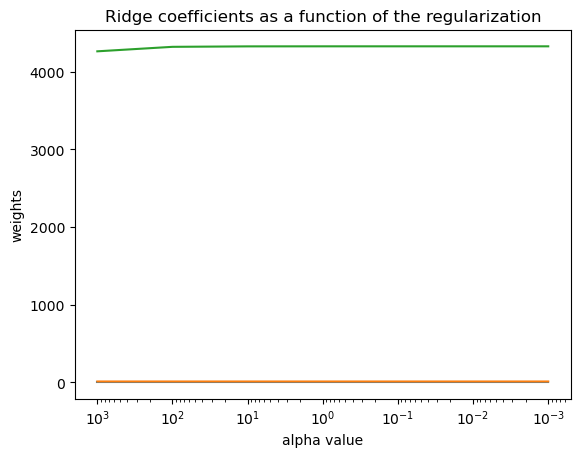

In [33]:
# we survey all the alpha numbers in this section 
import matplotlib.pyplot as plt
alphas = [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]
coefs = []
for i in alphas:
    ridge = Ridge(alpha=i, fit_intercept=False)
    ridge.fit(X_train.values, y_train) #be careful if not using values, could lead to issue of losing features for plt
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha value')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [84]:
X_train

odometer    year  transmission
132621  135000.0  2016.0             1
38495    70000.0  2012.0             1
217166  159515.0  2015.0             1
279810   19947.0  2017.0             1
136114  123191.0  2017.0             1
...          ...     ...           ...
329907    2308.0  2020.0             2
77249   118500.0  2010.0             1
134467  105458.0  2015.0             1
378689   38300.0  2019.0             1
11268   129800.0  1989.0             0

[375552 rows x 3 columns]

In [34]:
# perform permutation importance
from sklearn.inspection import permutation_importance
results = permutation_importance(model, X_train.values, y_train, scoring='neg_mean_squared_error')

Feature: 0, Score: 56112697.46501
Feature: 1, Score: 9523133.34193
Feature: 2, Score: 4023339.78178


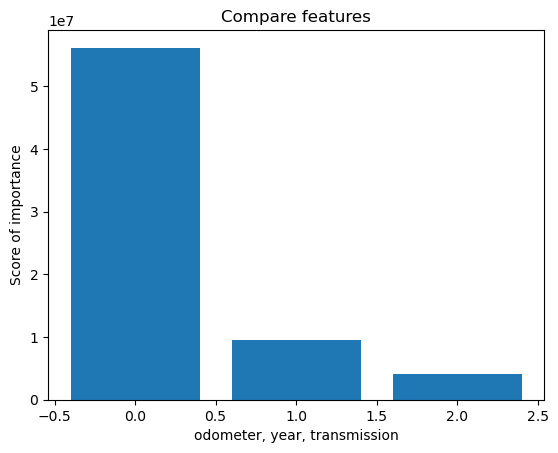

In [35]:
# get importance ranking from most important to least odometer>year>transmission 
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xlabel('odometer, year, transmission')
plt.ylabel('Score of importance') 
plt.title('Compare features')
plt.show()

In [36]:
#model 2 with lasso
#be careful if not using values, could lead to issue of losing features for plt
lasso_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 1, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
lasso_pipe.fit(X_train, y_train)
lasso_coefs = lasso_pipe.named_steps['lasso'].coef_
print(lasso_coefs)


[-5303.21423974  2186.84147071  1425.82182788]


In [37]:
#we can make a more general model in this case, you can also see the coefs values do not change much comparing to the previous lasso
model_selector_pipe = Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                                ('scaler', StandardScaler()),
                                ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])
model_selector_pipe.fit(X_train, y_train)
lasso_train_mse = mean_squared_error(y_train, model_selector_pipe.predict(X_train))
lasso_test_mse = mean_squared_error(y_test, model_selector_pipe.predict(X_test))
feature_names = lasso_pipe.named_steps['polyfeatures'].get_feature_names_out()
lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})
print(lasso_df)

print('lasso_train_mse = ', lasso_train_mse)
print('model_train_mse = ', model_train_mse)
print('lasso_test_mse = ', lasso_test_mse)
print('model_test_mse = ', model_test_mse)

        feature         coef
0      odometer -5303.214240
1          year  2186.841471
2  transmission  1425.821828
lasso_train_mse =  167078539.27995205
model_train_mse =  167078539.30027735
lasso_test_mse =  166626964.51915815
model_test_mse =  166626967.40104648


In [39]:
print(model_selector_pipe)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('scaler', StandardScaler()),
                ('selector', SelectFromModel(estimator=Lasso())),
                ('linreg', LinearRegression())])


In [42]:
from sklearn.model_selection import cross_val_score

cross_val_score(model_selector_pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()


-9424.299583298169

In [43]:
cross_val_score(pipe, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()

-9424.300684981763

In [89]:
#Based on the finding, we will proceed with lasso model to the business owner

In [45]:
#let us try some selected conditios like 10000 miles, 2000 yr made, automatic car worth how much (ca. 3k USD), and it is higher than older, more milage car
d = {'odometer': [10000, 20000], 'year': [2000, 1991], 'transmission': [1,1]}
df_random = pd.DataFrame(data=d)
print(model_selector_pipe.predict(df_random))

[21223.74120162 18273.60944799]


In [46]:
#Access model (only considering models, not taking into account all other results in the course of this analysis/modeling)
#based on mse model, lasso and rige gives us very similar MSE values to train and model. The conclusion is clear that both works well in this test

#Model assessment 
#In thie excercise, we also observed sth very interesting that train and test gives us similar MSE value, indicating we are not over fitting in both models

#Revised parameter settings 
#Beasd on the coef, we can see the strongest to weakest correlation as predicted in permutaiton analysis: odometer>year>transmission

In [47]:
# Based on the previous analysis, re-select data, based on the data quality analysis, to build a reliable model, we will only keep featuers releveant and without large portion of nan data for further analysis

df5 = df2 [[
 'price',
 'year',
 'manufacturer',
 'odometer',
 'transmission',
  ]]

In [48]:
#check again the missing-data
missing_data = pd.DataFrame(
    df5.isnull().sum(),
    columns=['Missing Values']
)
missing_data

Missing Values
price                      0
year                    1118
manufacturer           16508
odometer                   0
transmission            1668

In [49]:
df6 = df5.dropna(inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [50]:
# check again after removing NA values
# you can use similar code: df.isna().sum()
missing_data = pd.DataFrame(
    df5.isnull().sum(),
    columns=['Missing Values']
)
missing_data

Missing Values
price                      0
year                       0
manufacturer               0
odometer                   0
transmission               0

In [51]:
#list of manufacturer in the new analysis
df5['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [52]:
#this will tell us whether this make sense to have enough data to train each brand or enough data to consider this as a feature, if the sample size is too small, e.g. 1 or 10 ford, having it as a feature may damage our accuracy

df5['manufacturer'].value_counts()

ford               69622
chevrolet          53907
toyota             33589
honda              20910
jeep               18671
nissan             18664
ram                18078
gmc                16512
bmw                14570
dodge              13444
mercedes-benz      11487
hyundai            10152
subaru              9363
volkswagen          9209
kia                 8314
lexus               8091
audi                7464
cadillac            6833
chrysler            5922
acura               5920
buick               5404
mazda               5348
infiniti            4759
lincoln             4155
volvo               3262
mitsubishi          3254
mini                2356
pontiac             2258
rover               2070
jaguar              1934
porsche             1318
mercury             1181
saturn              1077
alfa-romeo           892
tesla                861
fiat                 786
harley-davidson      139
datsun                63
ferrari               51
aston-martin          21


In [53]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [54]:
X1 = df5.drop(['price'], axis=1)
y1 = df5['price']
print("shape of X1 = ", X1.shape)
print("shape of y1 = ", y1.shape)

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state = 32, test_size=.1)

shape of X1 =  (401935, 4)
shape of y1 =  (401935,)


In [55]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

cat_columns = ["manufacturer","transmission"]
num_columns = ["year","odometer"]
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
ohe.fit(X1_train[cat_columns])




OneHotEncoder(handle_unknown='ignore', sparse=False)

In [56]:
pd.DataFrame(ohe.transform(X1_train[cat_columns]))

0    1    2    3    4    5    6    7    8    9   ...   35   36   37  \
0       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2       0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
3       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
361736  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
361737  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
361738  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
361739  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
361740  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         38   39   40   41   42   43   44  
0       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
1       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
3       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4       0.0  0.0  0.0  0.0  1.0  0.0  0.0  
...     ...  ...  ...  ...  ...  ...  ...  
361736  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
361737  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
361738  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
361739  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
361740  0.0  1.0  0.0  0.0  1.0  0.0  0.0  

[361741 rows x 45 columns]

In [57]:
X1_train_cat_encoded = ohe.transform(X1_train[cat_columns])

In [58]:
X1_test_cat_encoded = ohe.transform(X1_test[cat_columns])

In [59]:
X1_train[num_columns]

year  odometer
306261  2015.0  156839.0
178660  2011.0   81590.0
4223    2015.0   32159.0
262808  2013.0   42045.0
302298  2015.0  105781.0
...        ...       ...
342536  2018.0   68111.0
80144   2019.0   30290.0
139780  2004.0  105528.0
393384  2012.0  165065.0
11715   2008.0  163933.0

[361741 rows x 2 columns]

In [60]:
r = StandardScaler()
r.fit(X1_train[num_columns])

StandardScaler()

In [61]:
r.transform(X1_train[num_columns])

array([[ 0.39050798,  1.05307453],
       [-0.06176293, -0.15412994],
       [ 0.39050798, -0.94714146],
       ...,
       [-0.85323702,  0.22990255],
       [ 0.0513048 ,  1.18504258],
       [-0.40096611,  1.16688213]])

In [62]:
X1_train_num_scaled = r.transform(X1_train[num_columns])

In [63]:
X1_test_num_scaled = r.transform(X1_test[num_columns])

In [64]:
X2_train = np.concatenate((X1_train_num_scaled, X1_train_cat_encoded), axis=1)
X2_train

array([[ 0.39050798,  1.05307453,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.06176293, -0.15412994,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.39050798, -0.94714146,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.85323702,  0.22990255,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.0513048 ,  1.18504258,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.40096611,  1.16688213,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [65]:
X2_test = np.concatenate((X1_test_num_scaled, X1_test_cat_encoded), axis=1)

In [66]:
# A similar but simpler method using column  transfer 
ct = make_column_transformer([
    ('scaler', StandardScaler(), num_columns),
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_columns),
],     remainder='drop')

In [67]:
# with one more feature, we are expecting a better MSE for both tain and test dataset as shown below with ca. 15% higher accuracy in this case
model_selector_pipe2 = Pipeline([('poly_features', PolynomialFeatures(degree = 1, include_bias = False)),
                                    ('selector', SelectFromModel(Lasso())),
                                    ('linreg', LinearRegression())])
model_selector_pipe2.fit(X2_train, y1_train)
lasso_train_mse2 = mean_squared_error(y1_train, model_selector_pipe2.predict(X2_train))
lasso_test_mse2 = mean_squared_error(y1_test, model_selector_pipe2.predict(X2_test))
#feature_names = model_selector_pipe2.named_steps['poly_features'].get_feature_names_out()
#lasso_df = pd.DataFrame({'feature': feature_names, 'coef': lasso_coefs})

In [68]:
print('lasso_train_mse2 = ', lasso_train_mse2, 'lasso_test_mse2 =', lasso_test_mse2)

lasso_train_mse2 =  142154350.56429264 lasso_test_mse2 = 142064920.3427807


In [69]:
#Cross validation comparing to previous models (at 9K), now we can reduce the error to be 8K with one more f this model gives us
cross_val_score(model_selector_pipe2, X2_train, y1_train, cv=5, scoring='neg_mean_absolute_error').mean()

-8400.592960346023

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
# Evaluate results: first of all, the model build in this case is a very universal model, with very limited input of data (year, transmission, odometer), the predicted price can narrow down to 10K USD as error rate
# The challenges is that due to the limit of computation power, the dataset is only a portion of the whole dataset (8-fold more in terms of size)
# Future directions: AI based model will do a much better work than linear regression 


In [ ]:
# Access of data mining results with respect to business success creteria:
# In principle, a business is based on the consistency of the model, which is shown not overfitting in this case, the model(s) build here provided the inital analysis of the price which address the business quesiton of predicting price with limited input of data
# Business Objectives: The goal is to understand what factors/features make a car more or less expensive, from the model and its coef, we can see the strongest to weakest correlation as predicted in permutaiton analysis: odometer>year>transmission
# Business Success Criteria is met: As a result of this model based analysis, the model should provide clear recommendations to the client what consumers value in a used car and we can provide a clear indication about the estimated price. For example: as shown before,let us try some selected conditios like 10000 miles, 2000 yr made, automatic car worth how much (ca. 3k USD), and it is higher than older, more milage car
# With this model, it is feasbile to put in any future features and give a predicted value of the car

In [ ]:
# Review process: in summary, the whole process start with overview of all the features in the dataset, remove outliers and Nan values, using graphic and correlation function to identify what are the factors contribute/correlate the price of the car. During the analysis, it is noticed the although the model and maker also could contribute a lot of the price, it is feasible that these two features could be looked into when building a newer model with larger dataset. We used the correct attributes with correct model, but we admit there is still room to improve with a much larger dataset. 

In [ ]:
# Determing the next step: with the model built, we can suggest a deployment and give it a pressure test first. 

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

In [ ]:
#Plan deployment: it is a general procedure used to identify and create the model in this case. all the parameters were fixed for any repeat needed. The model itself is ready for deployment and for sure training and interface could be employed for the customers 

In [ ]:
#Produce final report: In this project, we screened all the features, based on the avaiablity of the dataset, we narrow down factors: 'region', 'year',  'manufacturer', 'model', 'fuel', 'odometer', 'title_status','transmission', 'state'. Further correlation analysis narrown down the list to three major factors: odometer, year, and transmission. In the regression analysis, it is found that the impact sequence to price from strongest to weakest is odometer>year>transmission. We also have used one more feature, manufacturer to improve the accuracy, and it is expected that more features would give us higher accuracy but low compatibility. The lasso model is provided to predict the price. 

In [ ]:
#Review project: The initial analysis and data prep went well. However, the model (linear regression) gives a large MSE, with 10K difference on avarage between predicted value to test value. That could be improved with better model e.g. AI based model and larger dataset with more features could be selected. A group discussion could be beneficial across the class.